### Model Representation

### Goals
- Learn to implement the model $f_{w,b}$ for linear regression with one variable

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

### Problem Statement
- house rent prediction
- Size(sqft), Rent Price(in 1,000s of dollars)
- predict the price for other houses- says, a house with 1,200 sqft.

In [10]:
rent_df = pd.read_csv("~/Downloads/House Rent Prediction Dataset/House_Rent_Dataset.csv")
rent_df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [13]:
#x_train is the input variable
#y_train is the target
x_train = rent_df["Size"]
y_train = rent_df["Rent"]
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = 0       1100
1        800
2       1000
3        800
4        850
        ... 
4741    1000
4742    2000
4743    1750
4744    1500
4745    1000
Name: Size, Length: 4746, dtype: int64
y_train = 0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64


### Number of training examples `m`
- `m`: the number of training examples
- df.shape: returns (# of columns, # of rows)

  df.shape[0]: the length of the array and number of examples
- can also use the Python `len()` function

In [16]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (4746,)
Number of training examples is: 4746


In [18]:
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 4746


### Training example `x_i, y_i`

- (x$^{(i)}$, y$^{(i)}$) : $i^{th}$ training example

In [25]:
#(x^4745, y^4745)
for i in range(m):
    x_i = x_train[i]
    y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(4745), y^(4745)) = (1000, 15000)


### Plotting the data
- `scatter()` function
- arguments: `marker` and `c` sho the points as red crosses(the default is blue dots)
- plt.title("title")
- plt.xlabel("x_label")
- plt.ylabel("y_label")

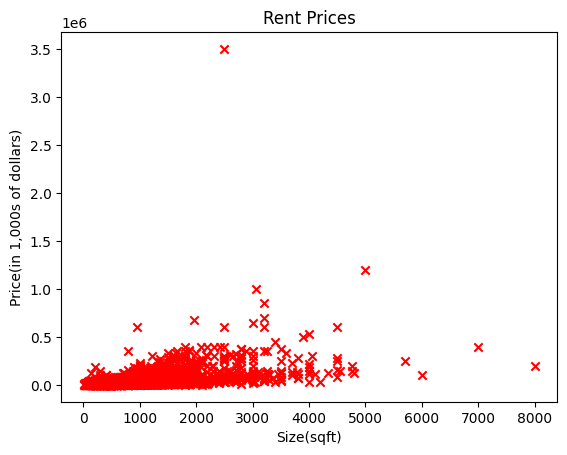

In [35]:
#Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
#Set the title
plt.title("Rent Prices")
#Set the y-axis label
plt.ylabel("Price(in 1,000s of dollars)")
#Set the x-axis label
plt.xlabel("Size(sqft)")
plt.show()

### Model function

the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot.

In [31]:
w = 5
b = 1.5

print(f"w: {w}")
print(f"b: {b}")

w: 5
b: 1.5


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`


In [37]:
def compute_model_output(x,w,b):
    '''
    computes the prediction of a linear model
    Args:
        x(pd.Serires): Data, m examples
        w,b (scalar) : model parameters
    Returns
        f_wb (pd.Series): model prediction
    '''
    
    f_wb = pd.Series(index=x.index)

    for i in x.index:
        f_wb[i] = w * x[i] + b
        #print(f"f_wb[{i}] = {w} * {x[i]} + {b} = {f_wb[i]}")

    return f_wb

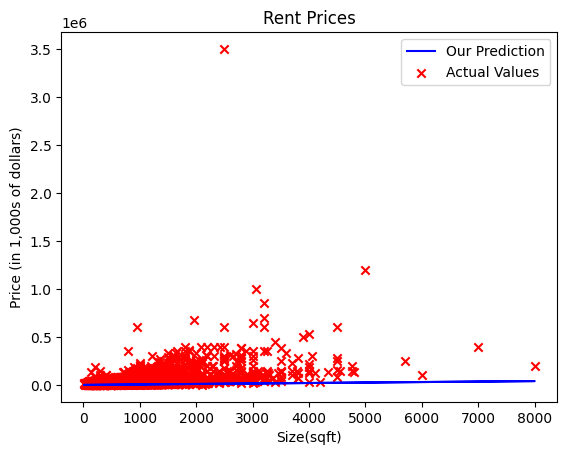

In [40]:
tmp_f_wb = compute_model_output(x_train, w, b)

#Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b', label= 'Our Prediction')

#Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r', label = 'Actual Values')

#Set the title
plt.title("Rent Prices")
#Set the y-axis label
plt.ylabel("Price (in 1,000s of dollars)")
#Set the x-axis label
plt.xlabel("Size(sqft)")
plt.legend()
plt.show()

### Prediction
- Predict the rent price of a house with 1,200 sqft.

In [48]:
w = 2
b = 0.2
x_i = 1200
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft/1000:.0f} thousand dollars")

$2 thousand dollars
